# The Solow Growth Model with Technological Progress

In this project, we aim to solve the basic Solow Growth Model to find the steady-state level of capital and simulate the growth of capital over time. As an extension, we include the rate of technological progress as a new parameter as it may be a means to achieve sustained economic growth.  

Imports and set magics:

In [5]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

### Solow Growth Model

The Solow growth model is a neoclassical economic model of long-run economic growth. It describes an economy with the following equations:

1. **Production Function:**
   \begin{aligned}
   Y = F(K, L) = K^{\alpha} (AL)^{1-\alpha}
   \end{aligned}
   where:
   - $Y$ is the output (GDP),
   - $K$ is the capital stock,
   - $L$ is the labor input,
   - $A$ is total factor productivity (TFP),
   - $α$ is the output elasticity of capital.

2. **Investment Equation:**
   \begin{aligned}
   I = sY = sF(K, L)
   \end{aligned}
   where:
   - $I$ is the investment,
   - $s$ is the savings rate.

3. **Capital Accumulation Equation:**
   \begin{aligned}
   \dot{K} = I - \delta K
   \end{aligned}
   where:
   - $\dot{K}$ is the change in capital stock over time, 
   - $\delta$ is the depreciation rate of capital.

4. **Population Growth Equation:**
   \begin{aligned}
   \dot{L} = nL
   \end{aligned}
   where:
   - $\dot{L}$ is the growth rate of the labor force,
   - $n$ is the population growth rate.

5. **Per Worker Production Function:**
   \begin{aligned}
   y = f(k) = k^{\alpha}
   \end{aligned}
   where:
   - $y = Y/L$ is the output per worker,
   - $k = K/L$ is the capital per worker.

6. **Dynamic Equation for Capital per Worker:**
   \begin{aligned}
   \dot{k} = sf(k) - (n + \delta)k
   \end{aligned}
   where:
   - $\dot{k}$ is the change in capital per worker over time.

These equations describe how capital and output evolve over time in an economy with exogenous population growth, technological progress, savings, and depreciation.

  




## Analytical solution

Solve for the steady state capital and plot the simulated growth path.

Steady State Capital: 183673.4693877551


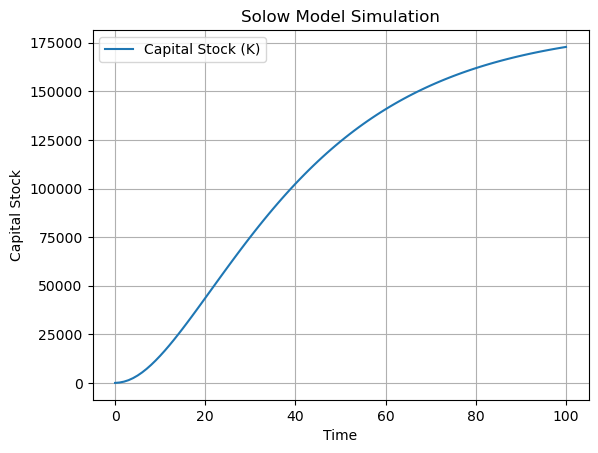

In [6]:
class SolowModel:
    # Set parameter values
    def __init__(self, s=0.3, n=0.02, delta=0.05, alpha=0.5, L=100, K0=50, T=100):
        self.s = s  # savings rate
        self.n = n  # population growth rate
        self.delta = delta  # depreciation rate
        self.alpha = alpha  # capital share of output
        self.L = L  # labor force
        self.K0 = K0  # initial capital
        self.T = T  # number of periods
        
    def steady_state_capital(self):
        return ((self.s * self.L) / (self.delta + self.n))**(1 / (1 - self.alpha))
    
    def solow_model(self, K):
        return self.s * self.L * (K**self.alpha) - (self.delta + self.n) * K
    
    def simulate(self):
        K = np.zeros(self.T+1)
        K[0] = self.K0
        for t in range(self.T):
            K[t+1] = K[t] + self.solow_model(K[t])
        return K
    
    def plot_simulation(self, K):
        t = np.arange(self.T+1)
        plt.plot(t, K, label='Capital Stock (K)')
        plt.xlabel('Time')
        plt.ylabel('Capital Stock')
        plt.title('Solow Model Simulation')
        plt.legend()
        plt.grid(True)
        plt.show()

# Main code
solow = SolowModel()
print("Steady State Capital:", solow.steady_state_capital())
K = solow.simulate()
solow.plot_simulation(K)


We now plot the steady state into the graph.

Steady State Capital: 183673.4693877551


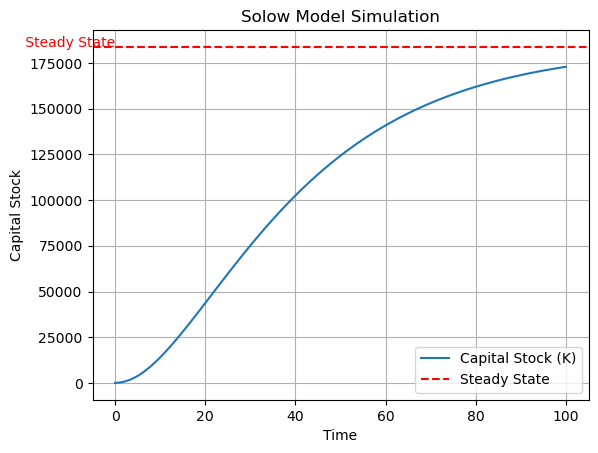

In [7]:
class SolowModel:
    def __init__(self, s=0.3, n=0.02, delta=0.05, alpha=0.5, L=100, K0=50, T=100):
        self.s = s  # savings rate
        self.n = n  # population growth rate
        self.delta = delta  # depreciation rate
        self.alpha = alpha  # capital share of output
        self.L = L  # labor force
        self.K0 = K0  # initial capital
        self.T = T  # number of periods
        
    def steady_state_capital(self):
        return ((self.s * self.L) / (self.delta + self.n))**(1 / (1 - self.alpha))
    
    def solow_model(self, K):
        return self.s * self.L * (K**self.alpha) - (self.delta + self.n) * K
    
    def simulate(self):
        K = np.zeros(self.T+1)
        K[0] = self.K0
        for t in range(self.T):
            K[t+1] = K[t] + self.solow_model(K[t])
        return K
    
    def plot_simulation(self, K):
        t = np.arange(self.T+1)
        plt.plot(t, K, label='Capital Stock (K)')
        
        # Calculate and plot the steady state
        steady_state = self.steady_state_capital()
        plt.axhline(y=steady_state, color='r', linestyle='--', label='Steady State')
        plt.text(0, steady_state, ' Steady State', color='r', fontsize=10, ha='right')
        
        plt.xlabel('Time')
        plt.ylabel('Capital Stock')
        plt.title('Solow Model Simulation')
        plt.legend()
        plt.grid(True)
        plt.show()

# Main code
solow = SolowModel()
print("Steady State Capital:", solow.steady_state_capital())
K = solow.simulate()
solow.plot_simulation(K)


We can also solve the model theoretically using Sympy.

In [8]:
# Define symbols
k_star = sm.symbols('k_star', real=True, positive=True)
s, n, delta, alpha = sm.symbols('s n delta alpha', real=True, positive=True)

# Define the steady-state equation
steady_state_eq = sm.Eq(s * k_star**alpha - (n + delta) * k_star, 0)

# Solve for the steady state of capital per worker
steady_state_solution = sm.solve(steady_state_eq, k_star)

# Display the solution
print("Steady State of Capital per Worker (k*):")
display(steady_state_solution)

Steady State of Capital per Worker (k*):


[((delta + n)/s)**(1/(alpha - 1))]

## Numerical solution

The Steady State capital is calculated below:

In [9]:
solow = SolowModel()
print("Steady State Capital:", solow.steady_state_capital())
K = solow.simulate()

Steady State Capital: 183673.4693877551


# Further analysis

In this extension, we introduced a new parameter `g` representing the rate of technological progress. The `solow_model` method now incorporates the effect of technological progress by multiplying the production function by $(1 + g)^t$, where $t$ is the time period.


In [10]:
class SolowModel:
    def __init__(self, s=0.3, n=0.02, delta=0.05, alpha=0.5, L=100, K0=50, T=100, g=0):
        self.s = s  # savings rate
        self.n = n  # population growth rate
        self.delta = delta  # depreciation rate
        self.alpha = alpha  # capital share of output
        self.L = L  # labor force
        self.K0 = K0  # initial capital
        self.T = T  # number of periods
        self.g = g  # technological progress rate

    def solow_model(self, K, t):
        A = (1 + self.g)**t  # Technological progress
        return self.s * self.L * (K**self.alpha) * A - (self.delta + self.n + self.g) * K

    def simulate_with_technological_progress(self):
        K = np.zeros(self.T+1)
        K[0] = self.K0
        for t in range(self.T):
            K[t+1] = self.solow_model(K[t], t)
        return K

Visualizing the technological progess

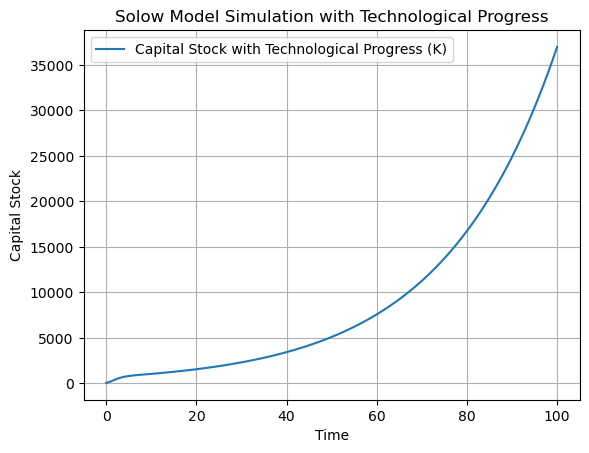

In [11]:
# Main code
solow = SolowModel(g=0.02)  # Specify technological progress rate
K_with_technological_progress = solow.simulate_with_technological_progress()

# Plotting the simulation with technological progress
t = np.arange(solow.T+1)
plt.plot(t, K_with_technological_progress, label='Capital Stock with Technological Progress (K)')
plt.xlabel('Time')
plt.ylabel('Capital Stock')
plt.title('Solow Model Simulation with Technological Progress')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

When the parameter $g$, which is the rate of technological progress, is added into the model, the growth path of capital stock over time becomes convex instead of concave. This indicates that the level of capital stock is no longer increasing at a decreasing rate. This is aligns with how technological progress makes labour more effective, which improves the rate of capital accumulation, allowing for sustained economic growth.